# Correzioni varie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [2]:
home_path = os.path.abspath(os.getcwd())
home_path

'c:\\Users\\User\\OneDrive\\Documenti\\Uni_nuovo\\Necst\\NL2project\\FDAxEEG\\Dataset'

## Functions

In [106]:
import scipy
import skfda

In [109]:
def Integrale(canale, banda, home_path):
    
    # loading the data of ADHD
    filename_adhd = home_path+"\ADHD_Matrici_medie\zona"+str(canale)+"_p"+str(banda)
    mat = scipy.io.loadmat(filename_adhd)
    PSD_ADHD=mat['avg']
    df_Channel=pd.DataFrame(data=PSD_ADHD)
    Channel=df_Channel.to_numpy(dtype=None, copy=False)
    Channel = np.nan_to_num(Channel)
    ADHD=skfda.FDataGrid(data_matrix=Channel)
    ADHD.interpolation=skfda.representation.interpolation.SplineInterpolation(interpolation_order=3)

    # loading the data of control
    filename_control = home_path+"\Control_Matrici_medie\zona"+str(canale)+"_p"+str(banda)
    mat = scipy.io.loadmat(filename_control)
    PSD_control=mat['avg']
    df_Channel=pd.DataFrame(data=PSD_control)
    Channel=df_Channel.to_numpy(dtype=None, copy=False)
    Channel = np.nan_to_num(Channel)
    Control=skfda.FDataGrid(data_matrix=Channel)
    Control.interpolation=skfda.representation.interpolation.SplineInterpolation(interpolation_order=3)

    # compute the derivatives of the functions
    ADHD_der=ADHD.derivative()
    Control_der=Control.derivative()

    # integral of the derivative of the adhd group
    ADHD_der_abs = ADHD_der
    ADHD_der_abs.data_matrix=np.abs(ADHD_der.data_matrix)

    n_adhd = ADHD_der_abs.data_matrix.shape[0]

    int_adhd = np.empty(n_adhd)
    for i in range(n_adhd):
        int_adhd[i]=scipy.integrate.simpson(np.transpose(ADHD_der_abs.data_matrix[i]), ADHD_der_abs.grid_points[0])
        
    
    # print("ADHD:")
    # print("Median: "+str(np.median(int_adhd)))
    # print("Mean: "+str(np.mean(int_adhd)))
    # print("Starndard deviation: "+str(np.std(int_adhd)))

    # integral of the derivative of the control group
    Control_der_abs = Control_der
    Control_der_abs.data_matrix=np.abs(Control_der.data_matrix)

    n_cont = Control_der_abs.data_matrix.shape[0]

    int_cont = np.empty(n_cont)
    for i in range(n_cont):
        int_cont[i]=scipy.integrate.simpson(np.transpose(Control_der_abs.data_matrix[i]), Control_der_abs.grid_points[0])

    
    # print("Control:")
    # print("Median: "+str(np.median(int_cont)))
    # print("Mean: "+str(np.mean(int_cont)))
    # print("Starndard deviation: "+str(np.std(int_cont)))

    # ANOVA

    #aov = scipy.stats.f_oneway(int_adhd,int_cont, axis=0)
    # print("ANOVA results: \nF statistics: \t"+str(aov.statistic)+"\np_value: \t"+ str(aov.pvalue))

    #res = permutation_test((int_adhd, int_cont), statistic, alternative='two-sided')
    return int_adhd, int_cont

In [107]:
def Norma(canale, banda, home_path, order=2):
    
    # loading the data of ADHD
    filename_adhd = home_path+"\ADHD_Matrici_medie\zona"+str(canale)+"_p"+str(banda)
    mat = scipy.io.loadmat(filename_adhd)
    PSD_ADHD=mat['avg']
    df_Channel=pd.DataFrame(data=PSD_ADHD)
    Channel=df_Channel.to_numpy(dtype=None, copy=False)
    Channel = np.nan_to_num(Channel)
    ADHD=skfda.FDataGrid(data_matrix=Channel)
    ADHD.interpolation=skfda.representation.interpolation.SplineInterpolation(interpolation_order=3)

    # loading the data of control
    filename_control = home_path+"\Control_Matrici_medie\zona"+str(canale)+"_p"+str(banda)
    mat = scipy.io.loadmat(filename_control)
    PSD_control=mat['avg']
    df_Channel=pd.DataFrame(data=PSD_control)
    Channel=df_Channel.to_numpy(dtype=None, copy=False)
    Channel = np.nan_to_num(Channel)
    Control=skfda.FDataGrid(data_matrix=Channel)
    Control.interpolation=skfda.representation.interpolation.SplineInterpolation(interpolation_order=3)

    # L2 norm of ADHD group
    n_adhd = ADHD.data_matrix.shape[0]

    norm_adhd = np.empty(n_adhd)
    for i in range(n_adhd):
        norm_adhd[i]=np.linalg.norm(ADHD.data_matrix[i], ord = order)

    # L2 norm of control group
    n_cont = Control.data_matrix.shape[0]

    norm_cont = np.empty(n_cont)
    for i in range(n_cont):
        norm_cont[i]=np.linalg.norm(Control.data_matrix[i], ord = order)

    # ANOVA

    #aov = scipy.stats.f_oneway(norm_adhd,norm_cont, axis=0)
    # print("ANOVA results: \nF statistics: \t"+str(aov.statistic)+"\np_value: \t"+ str(aov.pvalue))

    #res = permutation_test((norm_adhd, norm_cont), statistic, alternative='two-sided')
    return norm_adhd, norm_cont


In [110]:
def Picco(canale, banda, home_path):
    
    # loading the data of ADHD
    filename_adhd = home_path+"\ADHD_Matrici_medie\zona"+str(canale)+"_p"+str(banda)
    mat = scipy.io.loadmat(filename_adhd)
    PSD_ADHD=mat['avg']
    df_Channel=pd.DataFrame(data=PSD_ADHD)
    Channel=df_Channel.to_numpy(dtype=None, copy=False)
    Channel = np.nan_to_num(Channel)
    ADHD=skfda.FDataGrid(data_matrix=Channel)
    ADHD.interpolation=skfda.representation.interpolation.SplineInterpolation(interpolation_order=3)

    # loading the data of control
    filename_control = home_path+"\Control_Matrici_medie\zona"+str(canale)+"_p"+str(banda)
    mat = scipy.io.loadmat(filename_control)
    PSD_control=mat['avg']
    df_Channel=pd.DataFrame(data=PSD_control)
    Channel=df_Channel.to_numpy(dtype=None, copy=False)
    Channel = np.nan_to_num(Channel)
    Control=skfda.FDataGrid(data_matrix=Channel)
    Control.interpolation=skfda.representation.interpolation.SplineInterpolation(interpolation_order=3)

    Picco_ADHD=ADHD.data_matrix.max(1)
        
    # print("ADHD:")
    # print("Median: "+str(np.median(Picco_ADHD)))
    # print("Mean: "+str(np.mean(Picco_ADHD)))
    # print("Starndard deviation: "+str(np.std(Picco_ADHD)))

    Picco_Control=Control.data_matrix.max(1)

    # print("Control:")
    # print("Median: "+str(np.median(Picco_Control)))
    # print("Mean: "+str(np.mean(Picco_Control)))
    # print("Starndard deviation: "+str(np.std(Picco_Control)))

    # ANOVA

    #aov = scipy.stats.f_oneway(Picco_ADHD, Picco_Control)
    # print("ANOVA results: \nF statistics: \t"+str(aov.statistic)+"\np_value: \t"+ str(aov.pvalue))

    #res = permutation_test((Picco_ADHD, Picco_Control), statistic, alternative='two-sided')
    return Picco_ADHD, Picco_Control


## Loading the p-val

In [108]:
# per risalire dall'elemento del vettore al canale e banda basta sapere che se ci si trova in
# posizione i 
# i = 5*zona + banda
# zona = i mod 5 
# banda = i - i mod 5 * 5

p_val_int = np.array([0.5286,  0.4052,  0.3312,  0.1022,  0.2952,
                      0.0454,  0.0394,  0.0002,  0.0002,  0.2352,
                      0.4528,  0.5666,  0.1252,  0.1166,  0.7752,
                      0.6408,  0.5594,  0.6018,  0.0728,  0.0014,
                      0.3272,  0.2708,  0.1088,  0.2588,  0.0224,
                      0.1526,  0.9322,  0.3024,  0.2476,  0.0456,
                      0.0002,  0.0002,  0.0032,  0.0304,  0.4020])


p_val_norm = np.array([0.6820,  0.6504,  0.3608,  0.0118,  0.3410,
                    0.0002,  0.0012,  0.0002,  0.0002,  0.1232,
                    0.2532,  0.1022,  0.2542,  0.2148,  0.4512,
                    0.8926,  0.8962,  0.1468,  0.0526,  0.0016,
                    0.0204,  0.2140,  0.1850,  0.2968,  0.0410,
                    0.6058,  0.0620,  0.4740,  0.3442,  0.0656,
                    0.0002,  0.0002,  0.0062,  0.0164,  0.9768])

In [4]:
p_val_picco = np.array([0.7554,  0.2928,  0.1538,  0.0290,  0.2234,
                    0.0880,  0.1310,  0.0004,  0.0002,  0.9514,
                    0.2384,  0.4092,  0.7544,  0.0978,  0.7872,
                    0.9306,  0.5938,  0.4330,  0.0506,  0.0004,
                    0.3982,  0.7732,  0.2830,  0.1536,  0.0210,
                    0.2098,  0.9840,  0.9844,  0.7440,  0.0310,
                    0.0002,  0.0002,  0.0150,  0.0030,  0.1934])

In [89]:
func_p_val = pd.read_csv("p_val_functional.csv", sep = ',',index_col=False)
func_p_val = func_p_val.iloc[:,1:6]
func_p_val

,0,1,2,3,4
0,0.3850,0.3450,0.1625,0.9750,0.1985
1,0.0000,0.0010,0.0005,0.0000,0.1255
2,0.0500,0.0165,0.0000,0.0365,0.2990
3,0.0620,0.1300,0.2050,0.0125,0.0060
4,0.0010,0.0525,0.0440,0.0590,0.0300
5,0.0395,0.2940,0.0820,0.2310,0.0490
6,0.0000,0.0000,0.0005,0.0075,0.0650


In [90]:
p_val_func = func_p_val.to_numpy()
p_val_func = p_val_func.flatten()
p_val_func

array([3.850e-01, 3.450e-01, 1.625e-01, 9.750e-01, 1.985e-01, 0.000e+00,
       1.000e-03, 5.000e-04, 0.000e+00, 1.255e-01, 5.000e-02, 1.650e-02,
       0.000e+00, 3.650e-02, 2.990e-01, 6.200e-02, 1.300e-01, 2.050e-01,
       1.250e-02, 6.000e-03, 1.000e-03, 5.250e-02, 4.400e-02, 5.900e-02,
       3.000e-02, 3.950e-02, 2.940e-01, 8.200e-02, 2.310e-01, 4.900e-02,
       0.000e+00, 0.000e+00, 5.000e-04, 7.500e-03, 6.500e-02])

In [112]:
from audioop import reverse

def reversed_enumerate(l):
    return zip(range(len(l)-1, -1, -1), reversed(l))

In [92]:
def Hochberg(p_val_passed, alpha = 0.05, debug = False):

    p_val = p_val_passed.copy() # copy of the list to not modify it

    m = len(p_val)
    
    order = p_val.argsort()
    p_val = p_val[order]

    if debug:
        print('m = ',m,'\norder: ',order,'\npval sorted: ',p_val,'\n\nFor loop: \n')

    for i,p in reversed_enumerate(p_val):
        treshold = alpha/(m - i)    # alpha \ (m - (i + 1) + 1)
        if debug:
            print('i ordered = ',order[i],'\tpval = ',p,'\t treshold = ',treshold)
        if(p <= treshold):
            break

    if i == 0:
        idx_reject = []
    else:
        idx_reject = order[:(i+1)]
    
    if debug:
        print('\nindexes rejected: ', idx_reject)

    return idx_reject

In [100]:
def Holm(p_val_passed, alpha = 0.05):

    p_val = p_val_passed.copy()
    
    m = len(p_val)

    order = p_val.argsort()
    p_val.sort()
    idx_reject=[]

    for i,p in enumerate(p_val):
        if(p <= (alpha/(m - i))):
            idx_reject.append(order[i])

    return idx_reject

In [93]:
indxs_Hoch = Hochberg(p_val_func, debug = True)
indxs_Hoch

m =  35 
order:  [ 8 30 31 12  5 32  7  6 20 19 33 18 11 24 13 25 22 29 10 21 23 15 34 27
  9 16  2  4 17 28 26 14  1  0  3] 
pval sorted:  [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e-04 5.000e-04
 1.000e-03 1.000e-03 6.000e-03 7.500e-03 1.250e-02 1.650e-02 3.000e-02
 3.650e-02 3.950e-02 4.400e-02 4.900e-02 5.000e-02 5.250e-02 5.900e-02
 6.200e-02 6.500e-02 8.200e-02 1.255e-01 1.300e-01 1.625e-01 1.985e-01
 2.050e-01 2.310e-01 2.940e-01 2.990e-01 3.450e-01 3.850e-01 9.750e-01] 

For loop: 

i ordered =  3 	pval =  0.975 	 treshold =  0.05
i ordered =  0 	pval =  0.385 	 treshold =  0.025
i ordered =  1 	pval =  0.345 	 treshold =  0.016666666666666666
i ordered =  14 	pval =  0.299 	 treshold =  0.0125
i ordered =  26 	pval =  0.294 	 treshold =  0.01
i ordered =  28 	pval =  0.231 	 treshold =  0.008333333333333333
i ordered =  17 	pval =  0.205 	 treshold =  0.0071428571428571435
i ordered =  4 	pval =  0.1985 	 treshold =  0.00625
i ordered =  2 	pval =  0.1625 	 tresh

array([ 8, 30, 31, 12,  5, 32,  7,  6, 20], dtype=int64)

In [94]:
p_val_func[indxs_Hoch[-1]]

0.001

In [37]:
# matrice_picco_adhd = np.empty((555,indxs.size))
# matrice_picco_cont = np.empty((427,indxs.size))

# salvo le features di mio interesse
# della zona e banda di mio interesse devo avere vettore integrali di adhd e vettore integrali di control

indxs = indxs_Hoch

for i,indx in enumerate(indxs):
    zona = indx//5
    banda = indx - indx//5*5

    # !!qui correggi, abbiamo già i dati, dobbiamo selezionare le colonne interessanti!!

    # picco_adhd, picco_cont = Picco(canale=zona+1,  banda=banda+1, home_path=home_path)
    # matrice_picco_adhd[:,i] = np.reshape(picco_adhd, (555,))
    # matrice_picco_cont[:,i] = np.reshape(picco_cont, (427,))
    
    print('Zona: '+str(zona)+'\tBanda: '+str(banda))


Zona: 1	Banda: 3
Zona: 6	Banda: 0
Zona: 6	Banda: 1
Zona: 2	Banda: 2
Zona: 1	Banda: 0
Zona: 6	Banda: 2
Zona: 1	Banda: 2
Zona: 1	Banda: 1
Zona: 4	Banda: 0


In [48]:
func_p_val = pd.read_csv("p_val_functional.csv", sep = ',',index_col=False)
func_p_val = func_p_val.iloc[:,1:6]
p_val_func = func_p_val.to_numpy()
p_val_func = p_val_func.flatten()

In [54]:
indxs_holm = Holm(p_val_func)
indxs_holm

[8, 30, 31, 12, 5, 32, 7, 6, 20]

In [50]:
# matrice_picco_adhd = np.empty((555,indxs.size))
# matrice_picco_cont = np.empty((427,indxs.size))

# salvo le features di mio interesse
# della zona e banda di mio interesse devo avere vettore integrali di adhd e vettore integrali di control

indxs = indxs_holm

for i,indx in enumerate(indxs):
    zona = indx//5
    banda = indx - indx//5*5

    # !!qui correggi, abbiamo già i dati, dobbiamo selezionare le colonne interessanti!!

    # picco_adhd, picco_cont = Picco(canale=zona+1,  banda=banda+1, home_path=home_path)
    # matrice_picco_adhd[:,i] = np.reshape(picco_adhd, (555,))
    # matrice_picco_cont[:,i] = np.reshape(picco_cont, (427,))
    
    print('Zona: '+str(zona)+'\tBanda: '+str(banda))


Zona: 1	Banda: 3
Zona: 6	Banda: 0
Zona: 6	Banda: 1
Zona: 2	Banda: 2
Zona: 1	Banda: 0
Zona: 6	Banda: 2
Zona: 1	Banda: 2
Zona: 1	Banda: 1
Zona: 4	Banda: 0


In [96]:
p_val_feat=np.concatenate((p_val_int, p_val_norm, p_val_picco), axis=None)
p_val_feat

array([5.286e-01, 4.052e-01, 3.312e-01, 1.022e-01, 2.952e-01, 4.540e-02,
       3.940e-02, 2.000e-04, 2.000e-04, 2.352e-01, 4.528e-01, 5.666e-01,
       1.252e-01, 1.166e-01, 7.752e-01, 6.408e-01, 5.594e-01, 6.018e-01,
       7.280e-02, 1.400e-03, 3.272e-01, 2.708e-01, 1.088e-01, 2.588e-01,
       2.240e-02, 1.526e-01, 9.322e-01, 3.024e-01, 2.476e-01, 4.560e-02,
       2.000e-04, 2.000e-04, 3.200e-03, 3.040e-02, 4.020e-01, 6.820e-01,
       6.504e-01, 3.608e-01, 1.180e-02, 3.410e-01, 2.000e-04, 1.200e-03,
       2.000e-04, 2.000e-04, 1.232e-01, 2.532e-01, 1.022e-01, 2.542e-01,
       2.148e-01, 4.512e-01, 8.926e-01, 8.962e-01, 1.468e-01, 5.260e-02,
       1.600e-03, 2.040e-02, 2.140e-01, 1.850e-01, 2.968e-01, 4.100e-02,
       6.058e-01, 6.200e-02, 4.740e-01, 3.442e-01, 6.560e-02, 2.000e-04,
       2.000e-04, 6.200e-03, 1.640e-02, 9.768e-01, 7.554e-01, 2.928e-01,
       1.538e-01, 2.900e-02, 2.234e-01, 8.800e-02, 1.310e-01, 4.000e-04,
       2.000e-04, 9.514e-01, 2.384e-01, 4.092e-01, 

In [97]:
indxs_Hoch_feat = Hochberg(p_val_feat, debug = True)
# indxs_Hoch_feat


m =  105 
order:  [ 78  31  30  65  40  42   8  66  43 101   7 100  77  89  41  19  54 103
  32  67  38 102  68  55  94  24  73  33  99   6  59   5  29  88  53  61
  64  18  75  83   3  46  22  13  44  12  76  52  25  93  72  57 104  95
  56  48  74   9  80  28  45  47  23  21  92  71   4  58  27  20   2  39
  63  37  90  34   1  81  87  49  10  62   0  16  11  86  17  60  15  36
  35  98  82  70  91  14  84  50  51  85  26  79  69  96  97] 
pval sorted:  [2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04
 2.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04 4.000e-04 4.000e-04
 1.200e-03 1.400e-03 1.600e-03 3.000e-03 3.200e-03 6.200e-03 1.180e-02
 1.500e-02 1.640e-02 2.040e-02 2.100e-02 2.240e-02 2.900e-02 3.040e-02
 3.100e-02 3.940e-02 4.100e-02 4.540e-02 4.560e-02 5.060e-02 5.260e-02
 6.200e-02 6.560e-02 7.280e-02 8.800e-02 9.780e-02 1.022e-01 1.022e-01
 1.088e-01 1.166e-01 1.232e-01 1.252e-01 1.310e-01 1.468e-01 1.526e-01
 1.536e-01 1.538e-01 1.850e-01 1.934e-01 2.

In [98]:
# biggest pval considered

p_val_feat[indxs_Hoch_feat[-1]]

0.0004

In [101]:
indxs_Holm_feat = Holm(p_val_feat)
indxs_Holm_feat

[78, 31, 30, 65, 40, 42, 8, 66, 43, 101, 7, 100, 77, 89]

In [102]:
# Biggest pval considered
p_val_feat[indxs_Hoch_feat[-1]]

0.0004

In [104]:
print(len(indxs_Hoch_feat),len(indxs_Holm_feat))

indxs_Hoch_feat == indxs_Holm_feat

14 14


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

I due metodi prendono in considerazione le stesse features

In [119]:
indxs = indxs_Hoch_feat

matrice_adhd = np.empty((555,indxs.size))
matrice_cont = np.empty((427,indxs.size))

# salvo le features di mio interesse
# della zona e banda di mio interesse devo avere vettore di adhd e vettore di control

colnames = []
feat=['Int', 'Norm', 'Picco']

for i,indx in enumerate(indxs):
    feature = indx//35
    zona = (indx-35*feature)//5
    banda = (indx-35*feature) - (indx-35*feature)//5*5

    print('Feature: ' + feat[feature]+'\tZona: '+str(zona)+'\tBanda: '+str(banda))
    
    if feature == 0:
        adhd, cont = Integrale(canale = zona + 1, banda = banda + 1, home_path = home_path)
        colnames.append('int_z'+str(zona + 1)+'_b'+str(banda + 1))
    elif feature == 1:
        adhd, cont = Norma(canale = zona + 1, banda = banda + 1, home_path = home_path)
        colnames.append('norm_z'+str(zona + 1)+'_b'+str(banda + 1))
    else:
        adhd, cont = Norma(canale = zona + 1, banda = banda + 1, home_path = home_path)
        colnames.append('max_z'+str(zona + 1)+'_b'+str(banda + 1))

    matrice_adhd[:,i] = np.reshape(adhd, (555,))
    matrice_cont[:,i] = np.reshape(cont, (427,))
    

Feature: Picco	Zona: 1	Banda: 3
Feature: Int	Zona: 6	Banda: 1
Feature: Int	Zona: 6	Banda: 0
Feature: Norm	Zona: 6	Banda: 0
Feature: Norm	Zona: 1	Banda: 0
Feature: Norm	Zona: 1	Banda: 2
Feature: Int	Zona: 1	Banda: 3
Feature: Norm	Zona: 6	Banda: 1
Feature: Norm	Zona: 1	Banda: 3
Feature: Picco	Zona: 6	Banda: 1
Feature: Int	Zona: 1	Banda: 2
Feature: Picco	Zona: 6	Banda: 0
Feature: Picco	Zona: 1	Banda: 2
Feature: Picco	Zona: 3	Banda: 4


In [131]:
col_prova = colnames.copy()
col_prova.sort()

print(colnames)
print(col_prova)

['max_z2_b4', 'int_z7_b2', 'int_z7_b1', 'norm_z7_b1', 'norm_z2_b1', 'norm_z2_b3', 'int_z2_b4', 'norm_z7_b2', 'norm_z2_b4', 'max_z7_b2', 'int_z2_b3', 'max_z7_b1', 'max_z2_b3', 'max_z4_b5']
['int_z2_b3', 'int_z2_b4', 'int_z7_b1', 'int_z7_b2', 'max_z2_b3', 'max_z2_b4', 'max_z4_b5', 'max_z7_b1', 'max_z7_b2', 'norm_z2_b1', 'norm_z2_b3', 'norm_z2_b4', 'norm_z7_b1', 'norm_z7_b2']


In [132]:
col_sort = colnames.copy()
col_sort.sort()

In [133]:
df_adhd = pd.DataFrame(matrice_adhd, columns = colnames)

df_adhd = df_adhd[col_sort]
df_adhd.head()

,int_z2_b3,int_z2_b4,int_z7_b1,int_z7_b2,max_z2_b3,max_z2_b4,max_z4_b5,max_z7_b1,max_z7_b2,norm_z2_b1,norm_z2_b3,norm_z2_b4,norm_z7_b1,norm_z7_b2
0,927.151960,2501.529995,24.198602,129.886119,733.046185,1820.427313,9314.760834,44.268894,173.354080,44.846112,733.046185,1820.427313,44.268894,173.354080
1,753.313695,1584.194779,49.278778,222.241724,616.225203,1163.909000,5629.135395,52.006889,223.797745,34.186575,616.225203,1163.909000,52.006889,223.797745
2,819.394027,1317.382080,27.224983,211.900858,633.956804,996.891079,3966.955538,45.719299,216.256989,33.425988,633.956804,996.891079,45.719299,216.256989
3,853.109891,1251.061716,29.762903,181.486521,704.682143,921.627300,3928.213464,48.815273,219.864517,49.384021,704.682143,921.627300,48.815273,219.864517
4,918.740565,1327.294711,47.566680,185.767107,720.013432,979.173259,5503.246652,67.198456,251.180038,54.446815,720.013432,979.173259,67.198456,251.180038


In [134]:
df_cont = pd.DataFrame(matrice_cont, columns = colnames)

df_cont = df_cont[col_sort]
df_cont.head()

,int_z2_b3,int_z2_b4,int_z7_b1,int_z7_b2,max_z2_b3,max_z2_b4,max_z4_b5,max_z7_b1,max_z7_b2,norm_z2_b1,norm_z2_b3,norm_z2_b4,norm_z7_b1,norm_z7_b2
0,741.491478,1675.131128,19.242994,85.170599,590.542474,1236.084570,9148.106032,30.800262,93.392639,45.778662,590.542474,1236.084570,30.800262,93.392639
1,683.650439,1611.131506,30.138667,95.007281,569.101384,1194.311071,4652.871411,28.430513,105.568398,42.091806,569.101384,1194.311071,28.430513,105.568398
2,771.464274,1646.862031,16.172063,81.779248,615.822515,1212.918640,2686.582348,28.213587,96.441467,42.344802,615.822515,1212.918640,28.213587,96.441467
3,841.770886,1876.847969,22.033406,93.173586,726.836348,1390.978012,2258.620945,27.139099,98.877121,43.045576,726.836348,1390.978012,27.139099,98.877121
4,1070.625143,1858.665394,19.721313,61.755896,929.649930,1403.827606,3640.398381,28.406521,89.781868,41.907543,929.649930,1403.827606,28.406521,89.781868


In [135]:
df_adhd.to_csv('Hoch_Feat_adhd.csv')
df_cont.to_csv('Hoch_Feat_cont.csv')

# Classificatore

In [136]:
# creating the vector of the labels
y = np.append(np.ones((555, 1), dtype=int),np.zeros((427, 1), dtype=int))


# concatenating dataframe adhd e controllo
df = pd.concat([df_adhd, df_cont], axis = 0)
df.shape

(982, 14)

<AxesSubplot:xlabel='max_z4_b5', ylabel='Count'>

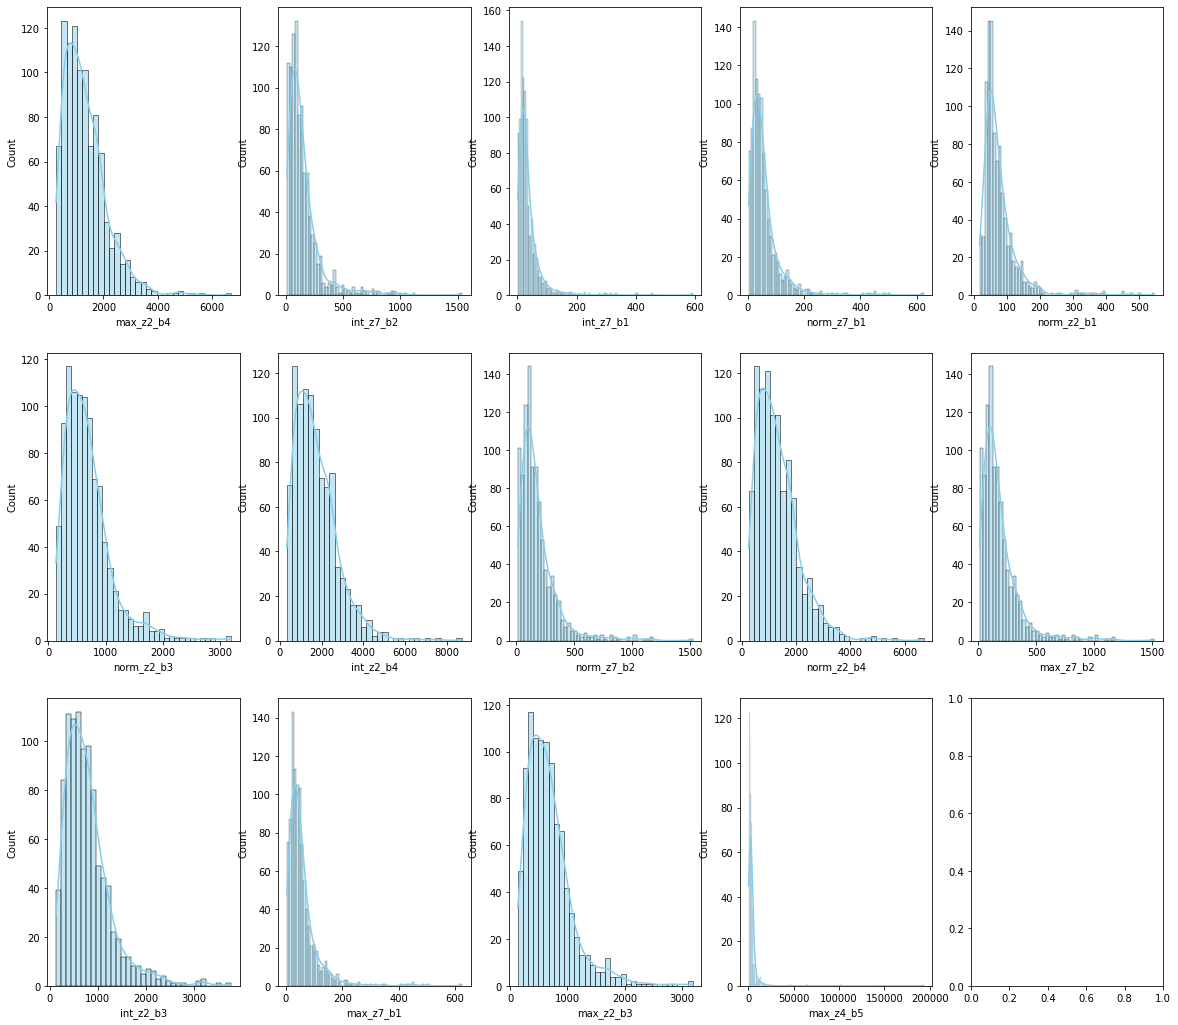

In [138]:
fig, axs = plt.subplots(3, 5, figsize=(20, 18))

sns.histplot(data=df[colnames[0]], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df[colnames[1]], kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=df[colnames[2]], kde=True, color="skyblue", ax=axs[0, 2])
sns.histplot(data=df[colnames[3]], kde=True, color="skyblue", ax=axs[0, 3])
sns.histplot(data=df[colnames[4]], kde=True, color="skyblue", ax=axs[0, 4])
sns.histplot(data=df[colnames[5]], kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df[colnames[6]], kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=df[colnames[7]], kde=True, color="skyblue", ax=axs[1, 2])
sns.histplot(data=df[colnames[8]], kde=True, color="skyblue", ax=axs[1, 3])
sns.histplot(data=df[colnames[9]], kde=True, color="skyblue", ax=axs[1, 4])
sns.histplot(data=df[colnames[10]], kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df[colnames[11]], kde=True, color="skyblue", ax=axs[2, 1])
sns.histplot(data=df[colnames[12]], kde=True, color="skyblue", ax=axs[2, 2])
sns.histplot(data=df[colnames[13]], kde=True, color="skyblue", ax=axs[2, 3])

In [139]:
df_log = np.log(df)

<AxesSubplot:xlabel='max_z4_b5', ylabel='Count'>

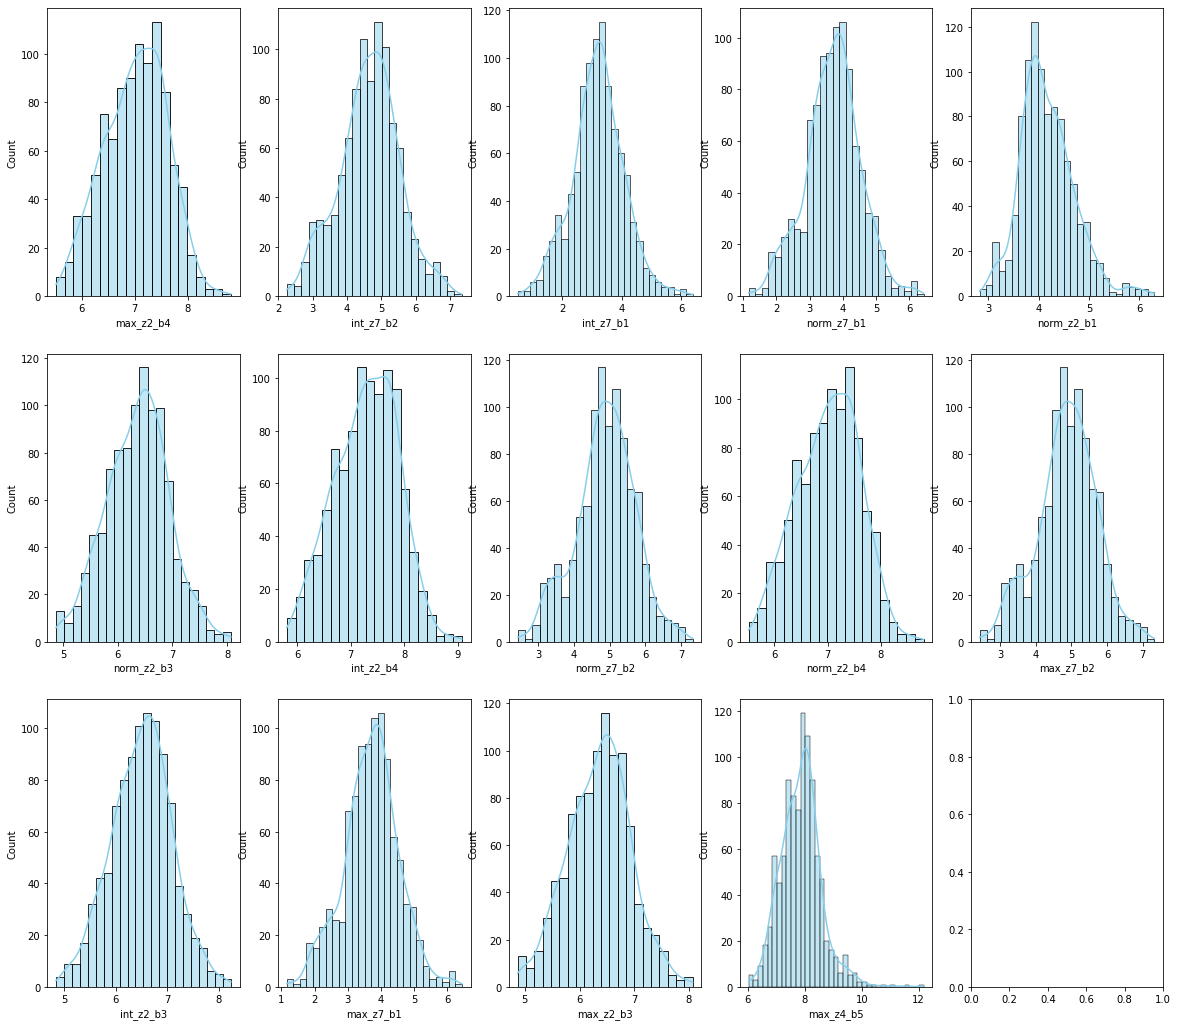

In [140]:
fig, axs = plt.subplots(3, 5, figsize=(20, 18))

sns.histplot(data=df_log[colnames[0]], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_log[colnames[1]], kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=df_log[colnames[2]], kde=True, color="skyblue", ax=axs[0, 2])
sns.histplot(data=df_log[colnames[3]], kde=True, color="skyblue", ax=axs[0, 3])
sns.histplot(data=df_log[colnames[4]], kde=True, color="skyblue", ax=axs[0, 4])
sns.histplot(data=df_log[colnames[5]], kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df_log[colnames[6]], kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=df_log[colnames[7]], kde=True, color="skyblue", ax=axs[1, 2])
sns.histplot(data=df_log[colnames[8]], kde=True, color="skyblue", ax=axs[1, 3])
sns.histplot(data=df_log[colnames[9]], kde=True, color="skyblue", ax=axs[1, 4])
sns.histplot(data=df_log[colnames[10]], kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df_log[colnames[11]], kde=True, color="skyblue", ax=axs[2, 1])
sns.histplot(data=df_log[colnames[12]], kde=True, color="skyblue", ax=axs[2, 2])
sns.histplot(data=df_log[colnames[13]], kde=True, color="skyblue", ax=axs[2, 3])

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = scaler.fit(df_log)
scaled_df = model.transform(df_log)

scaled_df = pd.DataFrame(scaled_df, columns = df_log.columns)

In [142]:
scaled_df = pd.concat([scaled_df,pd.DataFrame({'y': y})], axis=1)
# df_log_label['y'] = pd.Categorical(df_log_label['y'])

scaled_df['y'] = scaled_df.y.astype('category')
scaled_df.dtypes



int_z2_b3      float64
int_z2_b4      float64
int_z7_b1      float64
int_z7_b2      float64
max_z2_b3      float64
max_z2_b4      float64
max_z4_b5      float64
max_z7_b1      float64
max_z7_b2      float64
norm_z2_b1     float64
norm_z2_b3     float64
norm_z2_b4     float64
norm_z7_b1     float64
norm_z7_b2     float64
y             category
dtype: object

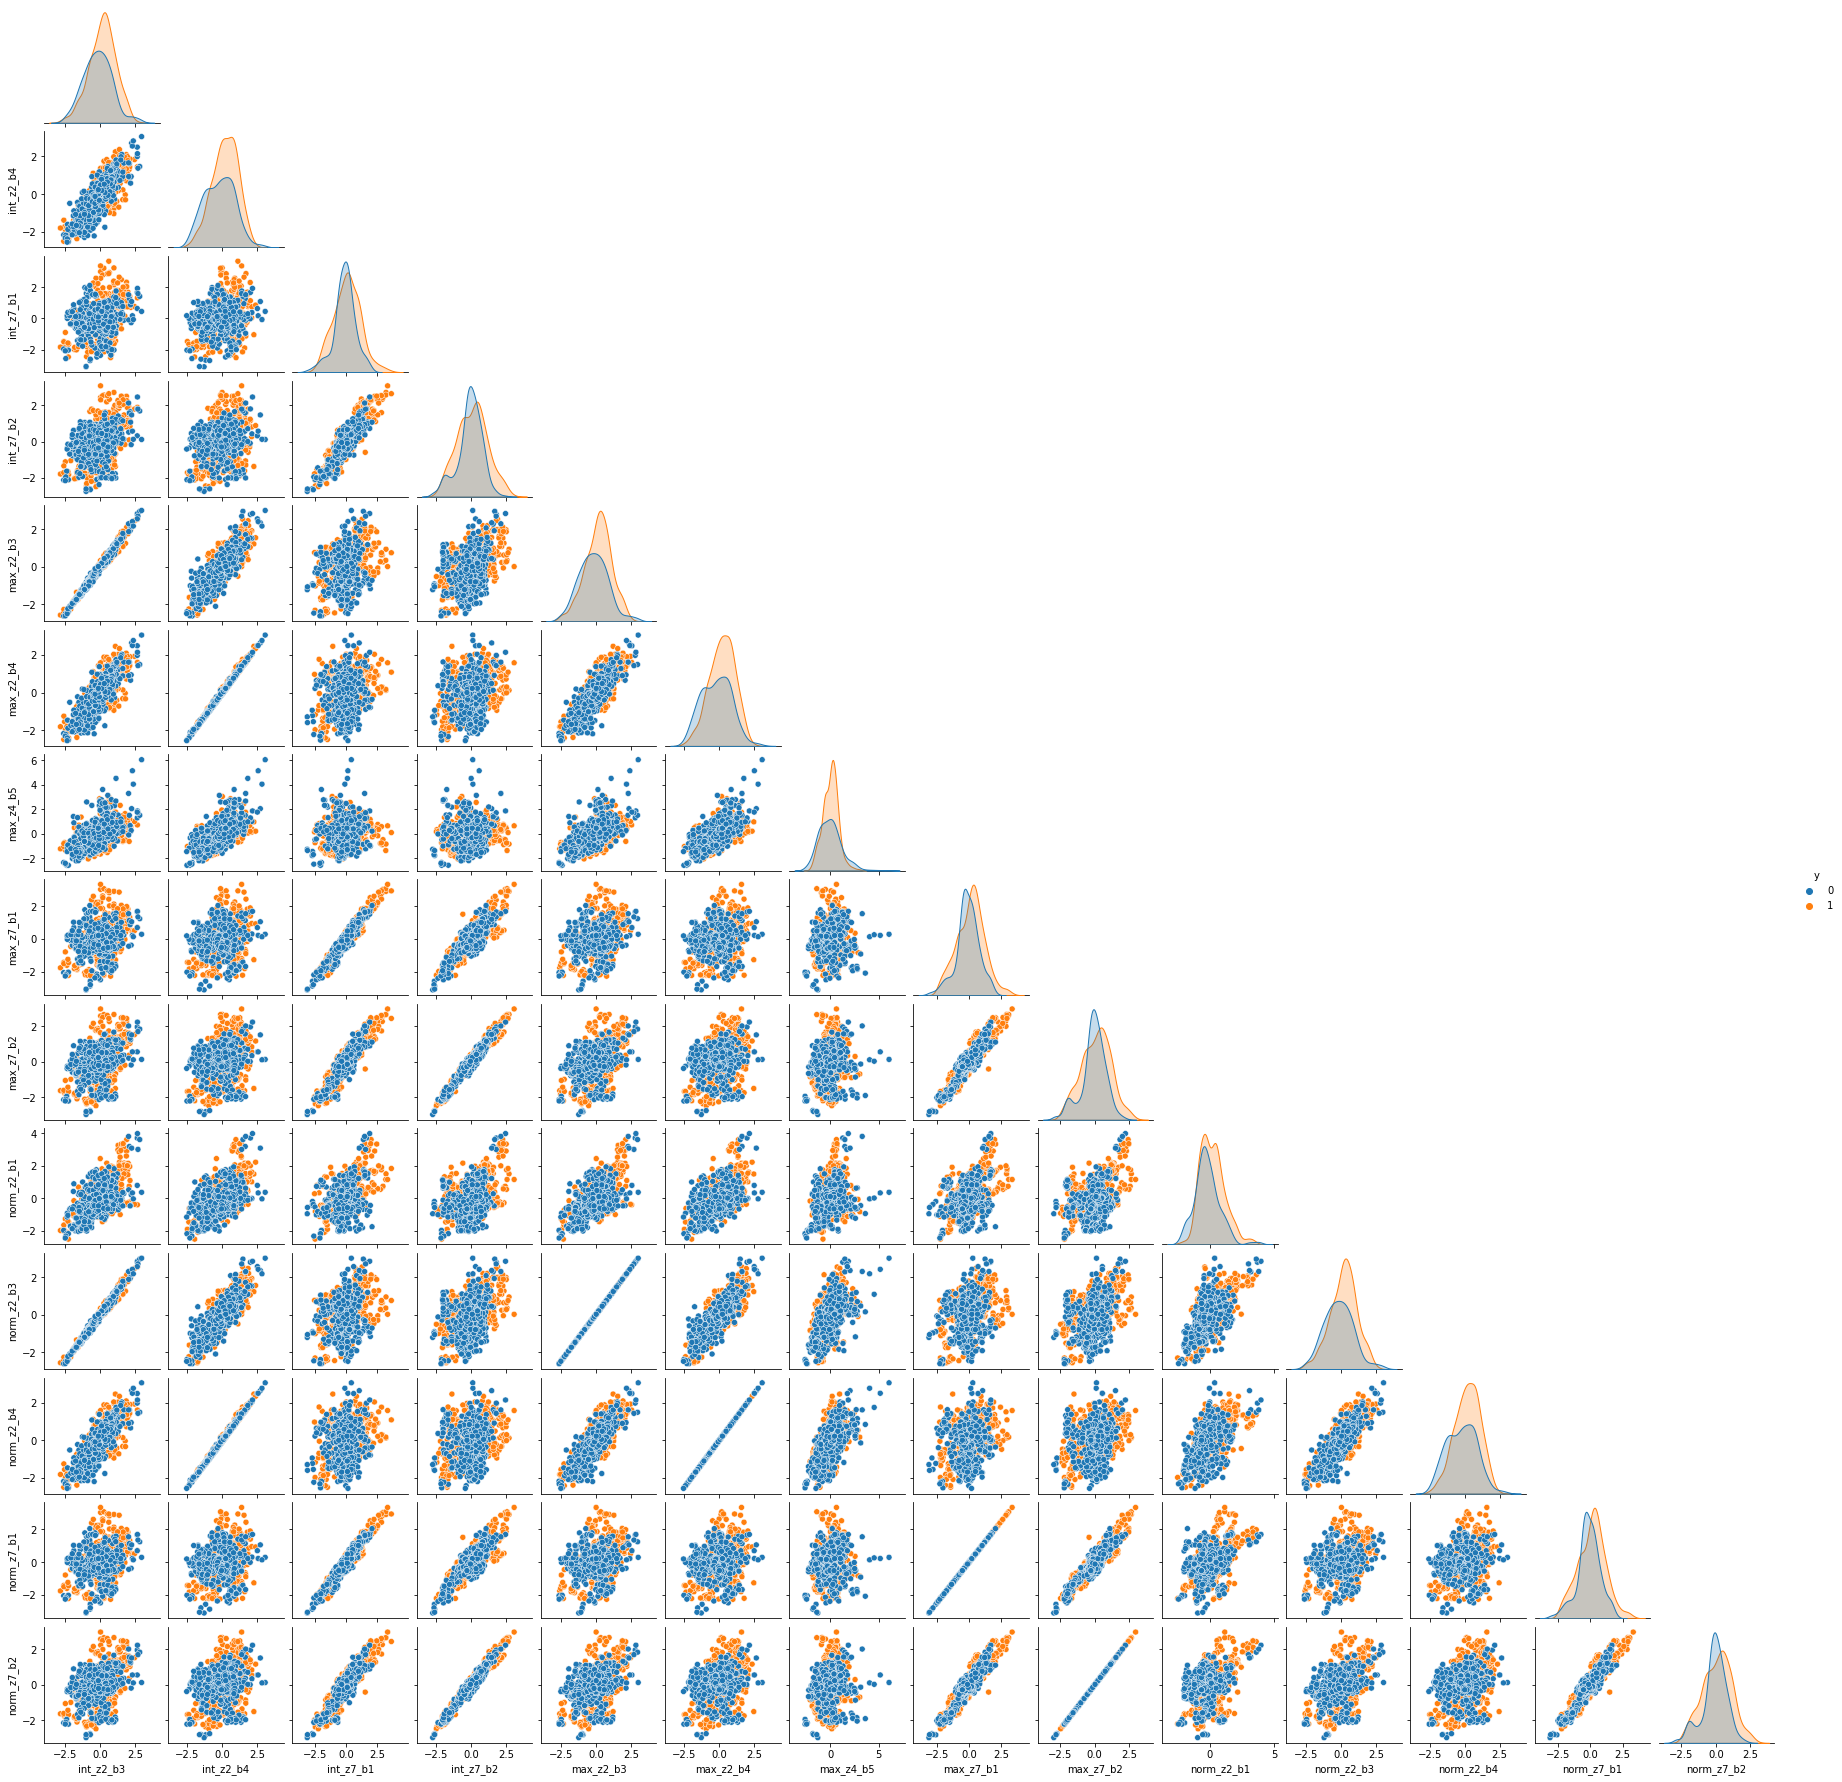

In [143]:
sns.pairplot(scaled_df, corner=True, height = 1.8, hue = 'y')

<AxesSubplot:>

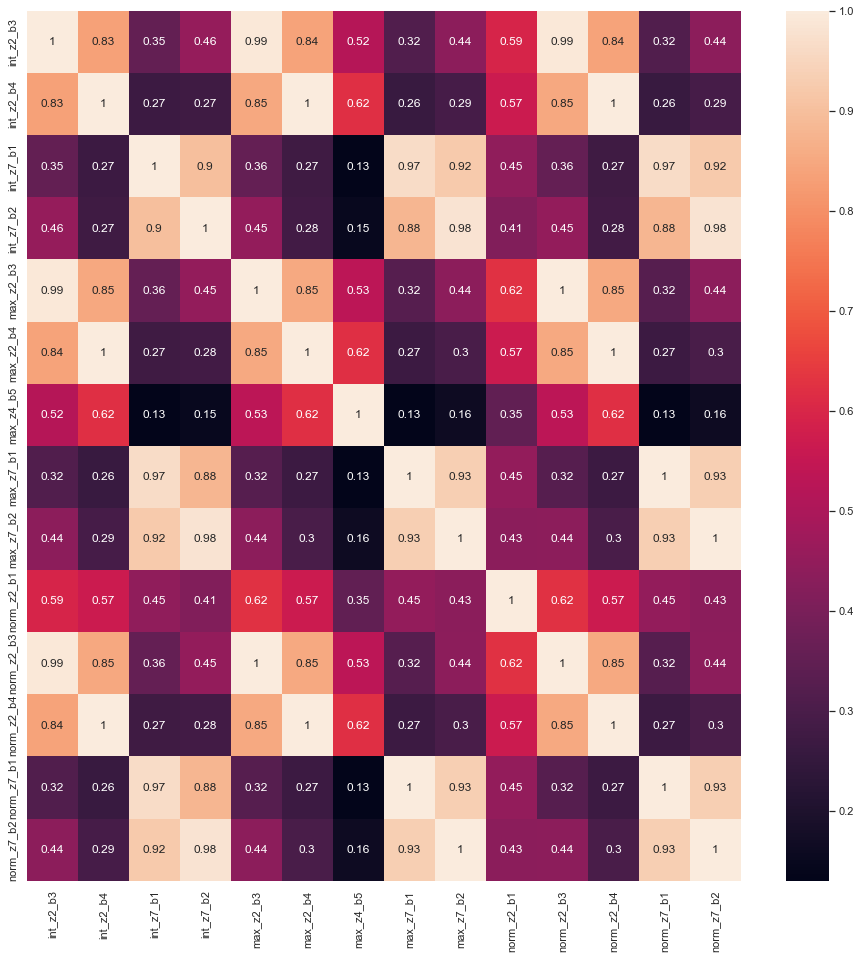

In [144]:
#define figure size
sns.set(rc={"figure.figsize":(16, 16)}) #width=16, height=16

sns.heatmap(df_log.corr(), annot=True)

Finding a couple of variables with correlation > 0.9 we chose to keep only one of the two

In [145]:
scaled_no_lab = scaled_df.drop('y', axis = 1)

inx_remove = []
corr_mat = scaled_no_lab.corr()

for i in range(scaled_no_lab.shape[1]):
    inx = corr_mat[corr_mat.iloc[:,i]> 0.9].index[(i+1):]
    for el in inx:
        inx_remove.append(el)

inx_remove = np.unique(inx_remove)
inx_remove


array(['max_z2_b3', 'norm_z2_b3', 'norm_z2_b4', 'norm_z7_b1',
       'norm_z7_b2'], dtype='<U10')

In [149]:
scaled_drop = scaled_no_lab.drop(inx_remove, axis = 1)
scaled_drop.head()

,int_z2_b3,int_z2_b4,int_z7_b1,int_z7_b2,max_z2_b4,max_z4_b5,max_z7_b1,max_z7_b2,norm_z2_b1
0,0.569054,0.911829,-0.019728,0.250635,0.838826,1.784737,0.102346,0.344112,-0.691563
1,0.213201,0.130205,0.798153,0.865710,0.076942,1.076367,0.298667,0.653761,-1.200248
2,0.357306,-0.185352,0.115789,0.811147,-0.186903,0.584156,0.141634,0.612207,-1.242418
3,0.426413,-0.273732,0.218286,0.633718,-0.320617,0.570353,0.221485,0.632264,-0.510902
4,0.553434,-0.172526,0.757488,0.660415,-0.217449,1.044555,0.610981,0.793702,-0.327978


In [148]:
# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Classification methods

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


# Evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [150]:
np.random.seed(1234)

X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(scaled_drop, y,
    test_size= 1/5.0, random_state =1234, shuffle=True)

crossvalidation = StratifiedKFold(n_splits=10, shuffle=True)

In [151]:
n_estimators = 100

In [152]:
method = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
    n_estimators=n_estimators)

xval_score = cross_val_score(method, X_train_drop, y_train_drop, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(0.7490749756572541, 0.04661630112290913)

In [153]:
method.fit(X_train_drop, y_train_drop)

yp = method.predict(X_test_drop)
yprob = method.predict_proba(X_test_drop)

print('Accuracy: '+str(accuracy_score(y_test_drop, yp)))
print('Precision: '+str(precision_score(y_test_drop, yp)))
print('Recall: '+str(recall_score(y_test_drop, yp)))
print('F1 score: ' + str(f1_score(y_test_drop, yp)))


Accuracy: 0.7563451776649747
Precision: 0.8272727272727273
Recall: 0.7583333333333333
F1 score: 0.7913043478260869


In [154]:
print(confusion_matrix(y_test_drop,yp, labels=[1,0]))
print(confusion_matrix(y_test_drop,yp, labels=[1,0], normalize='true'))

[[91 29]
 [19 58]]
[[0.75833333 0.24166667]
 [0.24675325 0.75324675]]


<BarContainer object of 9 artists>

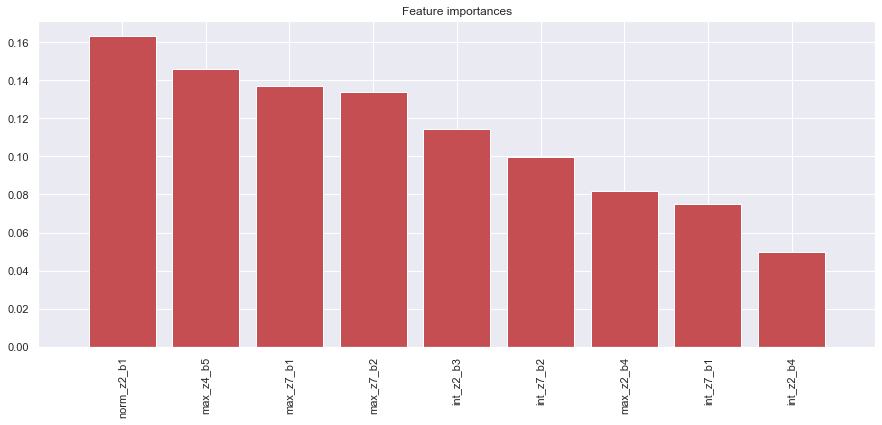

In [155]:
feat_imp = method.feature_importances_

indices = np.argsort(feat_imp)[::-1]

plt.rcParams["figure.figsize"] = (15,6)

plt.title("Feature importances")
plt.xticks(range(scaled_drop.shape[1]),scaled_drop.columns[indices],rotation='vertical')

plt.xlim([-1, scaled_drop.shape[1]])

plt.bar(range(scaled_drop.shape[1]), feat_imp[indices], color="r")


Prova invece con il dataset completo

In [156]:
X_train, X_test, y_train, y_test = train_test_split(scaled_no_lab, y,
    test_size= 1/5.0, random_state =1234, shuffle=True)

crossvalidation = StratifiedKFold(n_splits=10, shuffle=True)

In [157]:
method = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
    n_estimators=n_estimators)

xval_score = cross_val_score(method, X_train, y_train, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd


(0.7578708211619605, 0.03846277098588421)

In [158]:
method.fit(X_train, y_train)
yp = method.predict(X_test)
yprob = method.predict_proba(X_test)

print('Accuracy: '+str(accuracy_score(y_test, yp)))
print('Precision: '+str(precision_score(y_test, yp)))
print('Recall: '+str(recall_score(y_test, yp)))
print('F1 score: ' + str(f1_score(y_test, yp)))

print(confusion_matrix(y_test,yp, labels=[1,0]))
print(confusion_matrix(y_test,yp, labels=[1,0], normalize='true'))

Accuracy: 0.7715736040609137
Precision: 0.8378378378378378
Recall: 0.775
F1 score: 0.8051948051948051
[[93 27]
 [18 59]]
[[0.775      0.225     ]
 [0.23376623 0.76623377]]


<BarContainer object of 14 artists>

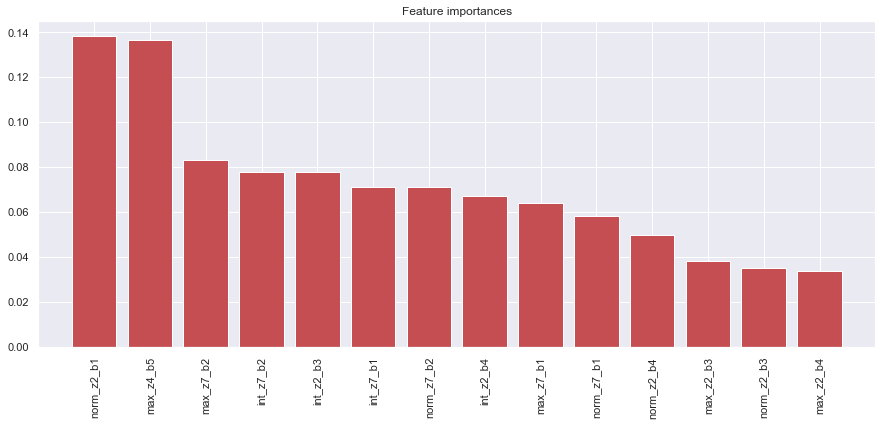

In [159]:
feat_imp = method.feature_importances_

indices = np.argsort(feat_imp)[::-1]

plt.rcParams["figure.figsize"] = (15,6)

plt.title("Feature importances")
plt.xticks(range(df_log.shape[1]),df_log.columns[indices],rotation='vertical')

plt.xlim([-1, df_log.shape[1]])

plt.bar(range(df_log.shape[1]), feat_imp[indices], color="r")


# Trying other classificators

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

## Random Forest
### Reduced dataset

In [175]:
method = RandomForestClassifier(n_estimators=n_estimators,max_depth=3,oob_score=True)

xval_score = cross_val_score(method, X_train_drop, y_train_drop, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(0.6878448555663745, 0.05591080014745903)

In [163]:
method.fit(X_train_drop, y_train_drop)

yp = method.predict(X_test_drop)
yprob = method.predict_proba(X_test_drop)

print('Accuracy: '+str(accuracy_score(y_test_drop, yp)))
print('Precision: '+str(precision_score(y_test_drop, yp)))
print('Recall: '+str(recall_score(y_test_drop, yp)))
print('F1 score: ' + str(f1_score(y_test_drop, yp)))

print(confusion_matrix(y_test_drop,yp, labels=[1,0]))
print(confusion_matrix(y_test_drop,yp, labels=[1,0], normalize='true'))

Accuracy: 0.7157360406091371
Precision: 0.75
Recall: 0.8
F1 score: 0.7741935483870969
[[96 24]
 [32 45]]
[[0.8        0.2       ]
 [0.41558442 0.58441558]]


### Full dataset

In [176]:
method = RandomForestClassifier(n_estimators=n_estimators,max_depth=3,oob_score=True)

xval_score = cross_val_score(method, X_train, y_train, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(0.6750567997403442, 0.05329933875006406)

In [177]:
method.fit(X_train, y_train)
yp = method.predict(X_test)
yprob = method.predict_proba(X_test)

print('Accuracy: '+str(accuracy_score(y_test, yp)))
print('Precision: '+str(precision_score(y_test, yp)))
print('Recall: '+str(recall_score(y_test, yp)))
print('F1 score: ' + str(f1_score(y_test, yp)))

print(confusion_matrix(y_test,yp, labels=[1,0]))
print(confusion_matrix(y_test,yp, labels=[1,0], normalize='true'))

Accuracy: 0.7411167512690355
Precision: 0.7482014388489209
Recall: 0.8666666666666667
F1 score: 0.8030888030888031
[[104  16]
 [ 35  42]]
[[0.86666667 0.13333333]
 [0.45454545 0.54545455]]


## Bagging
### Reduced dataset

In [170]:
method = BaggingClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators)

xval_score = cross_val_score(method, scaled_drop, y, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(0.6854153782725211, 0.043452162055475016)

In [171]:
method.fit(X_train_drop, y_train_drop)
yp = method.predict(X_test_drop)
yprob = method.predict_proba(X_test_drop)

print('Accuracy: '+str(accuracy_score(y_test_drop, yp)))
print('Precision: '+str(precision_score(y_test_drop, yp)))
print('Recall: '+str(recall_score(y_test_drop, yp)))
print('F1 score: ' + str(f1_score(y_test_drop, yp)))

print(confusion_matrix(y_test_drop,yp, labels=[1,0]))
print(confusion_matrix(y_test_drop,yp, labels=[1,0], normalize='true'))

Accuracy: 0.7563451776649747
Precision: 0.7903225806451613
Recall: 0.8166666666666667
F1 score: 0.8032786885245902
[[98 22]
 [26 51]]
[[0.81666667 0.18333333]
 [0.33766234 0.66233766]]


### Full dataset

In [173]:
xval_score = cross_val_score(method, scaled_df, y, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(1.0, 0.0)

In [174]:
method.fit(X_train, y_train)
yp = method.predict(X_test)
yprob = method.predict_proba(X_test)

print('Accuracy: '+str(accuracy_score(y_test, yp)))
print('Precision: '+str(precision_score(y_test, yp)))
print('Recall: '+str(recall_score(y_test, yp)))
print('F1 score: ' + str(f1_score(y_test, yp)))

print(confusion_matrix(y_test,yp, labels=[1,0]))
print(confusion_matrix(y_test,yp, labels=[1,0], normalize='true'))

Accuracy: 0.751269035532995
Precision: 0.7886178861788617
Recall: 0.8083333333333333
F1 score: 0.7983539094650206
[[97 23]
 [26 51]]
[[0.80833333 0.19166667]
 [0.33766234 0.66233766]]
